In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys #global location
location="/content/gdrive/My Drive/0IPSA/Ma512/TP/Projet/" #
sys.path.append(location) # The location of the .ipynb file.

%cd /content/gdrive/My Drive/0IPSA/Ma512/TP/Projet/

Mounted at /content/gdrive/
/content/gdrive/My Drive/0IPSA/Ma512/TP/Projet


In [2]:


import pandas as pd
import IPython
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import load_model, Model
from keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector, Bidirectional
from keras.layers import Dense, LSTM,GRU,SimpleRNN
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/0IPSA/Ma512/TP/Projet/Turbine_Data_project.csv')

columns = df.columns
print("Columns:", columns)
print(90*"_")
print(df.info())
df = df.drop(columns=[columns[0]])
print(90*"_")
print(df)


Columns: Index(['Unnamed: 0', 'WindSpeed', 'WindDirection', 'Power'], dtype='object')
__________________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     118224 non-null  int64  
 1   WindSpeed      118224 non-null  float64
 2   WindDirection  118224 non-null  float64
 3   Power          118224 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.6 MB
None
__________________________________________________________________________________________
        WindSpeed  WindDirection      Power
0        0.000000            0.0   0.000000
1        0.000000            0.0   0.000000
2        0.000000            0.0   0.000000
3        0.000000            0.0   0.000000
4        0.000000            0.0   0.000000
...           ...            ... 

In [4]:
data = df.to_numpy()
print("Shape of data:", data.shape)
#np.random.shuffle(data)

X = data[:,0:2]
print("Shape of X:", X.shape)

y = data[:,2].reshape(-1,1)
print("Shape of y:", y.shape)

trainSize = int(70/100*X.shape[0])
testSize = int(15/100*X.shape[0])
validationSize = int(15/100*X.shape[0])

train_set_X = X[:trainSize,:]
train_set_y = y[:trainSize,:]
train_X = train_set_X.reshape(-1,1,2)
train_y = train_set_y.reshape(-1,1,1)

test_set_X = X[X.shape[0]-testSize:,:]
test_set_y = y[y.shape[0]-testSize:,:]
test_X = test_set_X.reshape(-1,1,2)
test_y = test_set_y.reshape(-1,1,1)

validation_set_X = X[trainSize:trainSize+validationSize,:]
validation_set_y = y[trainSize:trainSize+validationSize,:]
val_X = validation_set_X.reshape(-1,1,2)
val_y = validation_set_y.reshape(-1,1,1)

print(95*'_')

print("Train set size:", trainSize)
print(train_set_X.shape, train_set_y.shape )
print("Validation set size:", validationSize)
print(validation_set_X.shape, validation_set_y.shape)
print("Test set size:", testSize)
print(test_set_X.shape, test_set_y.shape)

print(95*'_')

print("Data Configure for the model with the batch size:")
print("Shape of train:", train_X.shape, train_y.shape)
print("Shape of test:", test_X.shape, test_y.shape)
print("Shape of validation:", val_X.shape, val_y.shape)

Shape of data: (118224, 3)
Shape of X: (118224, 2)
Shape of y: (118224, 1)
_______________________________________________________________________________________________
Train set size: 82756
(82756, 2) (82756, 1)
Validation set size: 17733
(17733, 2) (17733, 1)
Test set size: 17733
(17733, 2) (17733, 1)
_______________________________________________________________________________________________
Data Configure for the model with the batch size:
Shape of train: (82756, 1, 2) (82756, 1, 1)
Shape of test: (17733, 1, 2) (17733, 1, 1)
Shape of validation: (17733, 1, 2) (17733, 1, 1)


Show that it is a time serie:

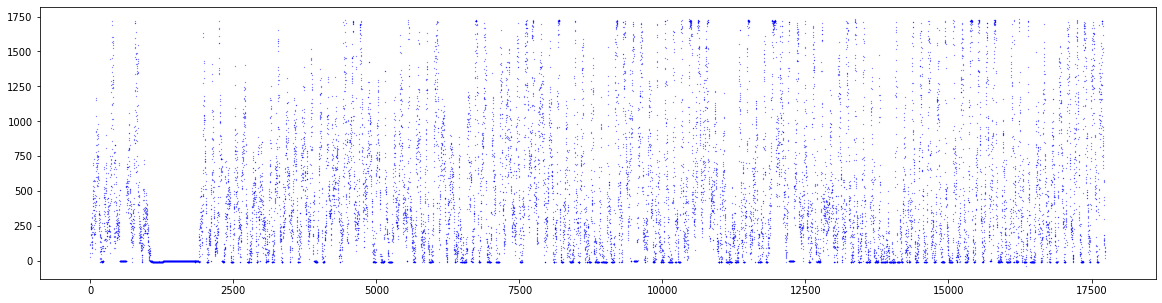

In [5]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(np.arange(1,test_y.shape[0]+1),test_set_y,'bo',markersize=0.2)


In [6]:
ndim = 2
n_hstate_LSTM = 64

reshapor = Reshape((1, ndim))                      

LSTM_cell = LSTM(n_hstate_LSTM, return_state = True, input_shape=(1, ndim))         
 

In [7]:
def buildModel(sequence_length, n_values, n_hstate, cell_type):
  """
   Implement the model
    Arguments:
    sequence_length -- length of the sequence 
    n_values -- number of unique values
    n_hstate -- the number of activations used in our model
    modelType -- the principal cell used for this model

    Returns:
    model -- a keras model.  
  """

  X = keras.layers.Input(shape=(sequence_length,n_values))
  if cell_type == LSTM_cell:
    A, _, C = cell_type(X)
  else: 
    A, C = cell_type(X)

  mid = keras.layers.Dense(10, activation = "relu")(A)
  output = keras.layers.Dense(1, activation = "relu")(mid)

  model = Model(X, output)

  model.summary()

  return model

sequence_length = 1
n_values = 2

print(30*"_" + "Model LSTM" + 30*"_")
model_LSTM = buildModel(sequence_length, n_values, n_hstate_LSTM, LSTM_cell)
    
# model = keras.Sequential()
# # Define the input of your model with a shape
# model.add(Input(shape=(sequence_length, n_values)))
# model.add(Reshape((1, n_values)))
# model.add(LSTM(10, return_sequences=True , input_shape=(1, n_values)))
# model.add(Dense(1, activation = "softmax"))

# model.summary()



______________________________Model LSTM______________________________
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 2)]            0         
                                                                 
 lstm (LSTM)                 [(None, 64),              17152     
                              (None, 64),                        
                              (None, 64)]                        
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,813
Trainable params: 17,813
Non-trainable params: 0
____________________________________________________

______________________________Model LSTM______________________________


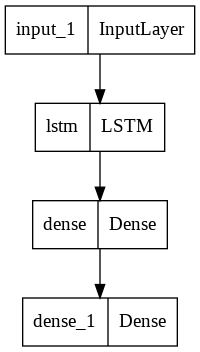

In [8]:
from keras.utils.vis_utils import plot_model
print(30*"_" + "Model LSTM" + 30*"_")
plot_model(model_LSTM)


In [9]:
model_LSTM.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
callback_loss = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [10]:
print(30*"_" + "Model LSTM" + 30*"_")
hist_LSTM = model_LSTM.fit(train_X, train_y, validation_data=(val_X, val_y), epochs=20, callbacks=[callback_loss])


______________________________Model LSTM______________________________
Epoch 1/20
2587/2587 [==============================] - 13s 4ms/step - loss: 212986.4062 - root_mean_squared_error: 461.5045 - val_loss: 25266.3965 - val_root_mean_squared_error: 158.9541
Epoch 2/20
2587/2587 [==============================] - 10s 4ms/step - loss: 21117.1992 - root_mean_squared_error: 145.3176 - val_loss: 18663.2559 - val_root_mean_squared_error: 136.6135
Epoch 3/20
2587/2587 [==============================] - 10s 4ms/step - loss: 19117.6367 - root_mean_squared_error: 138.2665 - val_loss: 19679.7598 - val_root_mean_squared_error: 140.2846
Epoch 4/20
2587/2587 [==============================] - 10s 4ms/step - loss: 18573.2656 - root_mean_squared_error: 136.2838 - val_loss: 17104.8223 - val_root_mean_squared_error: 130.7854
Epoch 5/20
2587/2587 [==============================] - 10s 4ms/step - loss: 18229.1504 - root_mean_squared_error: 135.0154 - val_loss: 16210.5420 - val_root_mean_squared_error: 12

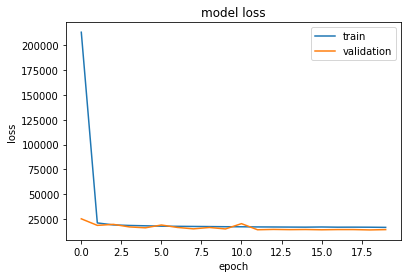

In [11]:
plt.plot(hist_LSTM.epoch, hist_LSTM.history['loss'])
plt.plot(hist_LSTM.epoch, hist_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.savefig("/content/gdrive/MyDrive/0IPSA/Ma511/TP/Project/model_loss_lstm.pdf", dpi=50) #Saving the output in a pdf file. 
plt.show()

In [12]:
n_batch_size = 512

score_LSTM = model_LSTM.evaluate(test_X, test_y, verbose=0, batch_size=n_batch_size)

print(30*"_" + "Model LSTM" + 30*"_")
print('Test loss (MSE):', score_LSTM[0])
print('Test RMSE:', score_LSTM[1])



______________________________Model LSTM______________________________
Test loss (MSE): 8723.919921875
Test RMSE: 93.40192413330078


555/555 [==============================] - 2s 3ms/step
Model LSTM, R2 Score is : 96.75671619525792  %


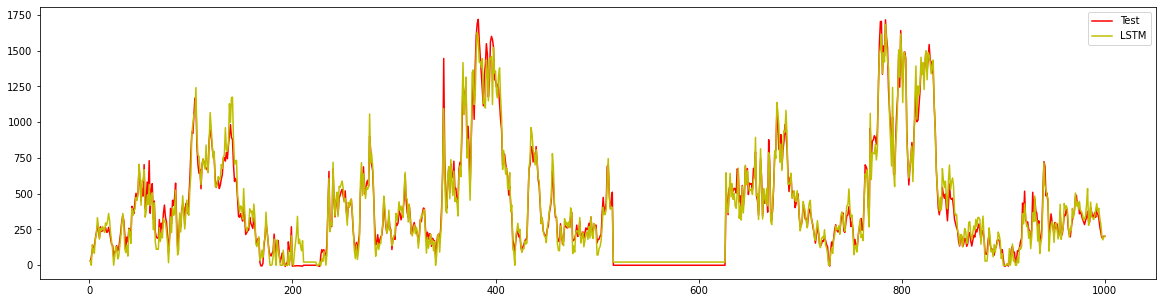

In [21]:
pred_LSTM = model_LSTM.predict(test_X)
len_series = 1000

fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(np.arange(1,len_series+1),test_set_y[:len_series],'r',markersize=2)
plt.plot(np.arange(1,len_series+1),pred_LSTM[:len_series],'y',markersize=1)
plt.legend(['Test', 'LSTM'], loc='upper right')

from sklearn.metrics import r2_score
print("Model LSTM, R2 Score is :",r2_score(test_set_y[:len_series],pred_LSTM[:len_series])*100, " %")